### 12章で作成した拡張データの可視化

In [1]:
%matplotlib inline
import copy
import numpy as np
import matplotlib.pyplot as plt

結節候補データを取得

In [2]:
import torch
from p2_ct_project.p2ch12.mod_dataset_luna import getCandidateInfoList, getCt, LunaDataset
from p2_ct_project.util.util import xyz2irc


candidateInfo_list = getCandidateInfoList(requireOnDisk_bool=False, datasetdir='E:/Luna16')
candidateInfo_list[0]

c:\Users\InoueShinichi\anaconda3\envs\Py39WorkingEnv\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


module_parent_dir c:\Users\InoueShinichi\Desktop\MyGithub\Book_HowToPytorch\p2_ct_project\p2ch12\..


CandidateInfoTuple(isNodule_bool=True, diameter_mm=32.27003025, series_uid='1.3.6.1.4.1.14519.5.2.1.6279.6001.287966244644280690737019247886', center_xyz=(67.61451718, 85.02525992, -109.8084416))

結節データを抽出

In [3]:
from p2_ct_project.p2ch12.visualize_luna import findPositiveSamples, showCandidate
positiveSample_list = findPositiveSamples(datasetdir='E:/Luna16')

module_parent_dir c:\Users\InoueShinichi\Desktop\MyGithub\Book_HowToPytorch\p2_ct_project\p2ch12\..\p2ch12\..


2023-05-22 18:59:53,103 INFO     pid:22468 p2ch12.mod_dataset_luna:330:__init__ <p2ch12.mod_dataset_luna.LunaDataset object at 0x00000296763ADEE0>: 551065 training samples, 549714 neg, 1351 pos, unbalanced ratio


0 CandidateInfoTuple(isNodule_bool=True, diameter_mm=32.27003025, series_uid='1.3.6.1.4.1.14519.5.2.1.6279.6001.287966244644280690737019247886', center_xyz=(67.61451718, 85.02525992, -109.8084416))
1 CandidateInfoTuple(isNodule_bool=True, diameter_mm=30.61040636, series_uid='1.3.6.1.4.1.14519.5.2.1.6279.6001.112740418331256326754121315800', center_xyz=(47.90350511, 37.60442008, -99.93417567))
2 CandidateInfoTuple(isNodule_bool=True, diameter_mm=30.61040636, series_uid='1.3.6.1.4.1.14519.5.2.1.6279.6001.112740418331256326754121315800', center_xyz=(44.19, 37.79, -107.01))
3 CandidateInfoTuple(isNodule_bool=True, diameter_mm=30.61040636, series_uid='1.3.6.1.4.1.14519.5.2.1.6279.6001.112740418331256326754121315800', center_xyz=(40.69, 32.19, -97.15))
4 CandidateInfoTuple(isNodule_bool=True, diameter_mm=27.44242293, series_uid='1.3.6.1.4.1.14519.5.2.1.6279.6001.943403138251347598519939390311', center_xyz=(-45.29440163, 74.86925386, -97.52812481))
5 CandidateInfoTuple(isNodule_bool=True, dia

データ拡張

In [4]:
augmentation_dict = {}
augmentation_list = [
    ('None', {}),
    ('flip', {'flip': True}),
    ('offset', {'offset': 0.1}),
    ('scale', {'scale': 0.2}),
    ('rotate', {'rotate': True}),
    ('noise', {'noise': 25.0})
]

dataset_list = [
    LunaDataset(datasetdir='E:/Luna16', sortby_str='label_and_size', augmentation_dict=augmentation_dict) 
    for title_str, augmentation_dict in augmentation_list
]

all_dict = {}
for title_str, augmentation_dict in augmentation_list:
    print('title', title_str)
    all_dict.update(augmentation_dict)
    # all_dict[title_str] = augmentation_dict
all_dataset = LunaDataset(datasetdir='E:/Luna16', sortby_str='label_and_size', augmentation_dict=all_dict)

print('augmentation_list', augmentation_list)

augmentation_list.extend([('All', all_dict)] * 3)
print('extended augmentaiton_list', augmentation_list)
dataset_list.extend([all_dataset] * 3)


2023-05-22 18:59:56,271 INFO     pid:22468 p2_ct_project.p2ch12.mod_dataset_luna:330:__init__ <p2_ct_project.p2ch12.mod_dataset_luna.LunaDataset object at 0x000002960906ADF0>: 551065 training samples, 549714 neg, 1351 pos, unbalanced ratio
2023-05-22 18:59:56,380 INFO     pid:22468 p2_ct_project.p2ch12.mod_dataset_luna:330:__init__ <p2_ct_project.p2ch12.mod_dataset_luna.LunaDataset object at 0x000002960906ABE0>: 551065 training samples, 549714 neg, 1351 pos, unbalanced ratio
2023-05-22 18:59:56,491 INFO     pid:22468 p2_ct_project.p2ch12.mod_dataset_luna:330:__init__ <p2_ct_project.p2ch12.mod_dataset_luna.LunaDataset object at 0x000002960906ADC0>: 551065 training samples, 549714 neg, 1351 pos, unbalanced ratio
2023-05-22 18:59:56,619 INFO     pid:22468 p2_ct_project.p2ch12.mod_dataset_luna:330:__init__ <p2_ct_project.p2ch12.mod_dataset_luna.LunaDataset object at 0x0000029673F63F10>: 551065 training samples, 549714 neg, 1351 pos, unbalanced ratio
2023-05-22 18:59:56,737 INFO     pid:224

title None
title flip
title offset
title scale
title rotate
title noise
augmentation_list [('None', {}), ('flip', {'flip': True}), ('offset', {'offset': 0.1}), ('scale', {'scale': 0.2}), ('rotate', {'rotate': True}), ('noise', {'noise': 25.0})]
extended augmentaiton_list [('None', {}), ('flip', {'flip': True}), ('offset', {'offset': 0.1}), ('scale', {'scale': 0.2}), ('rotate', {'rotate': True}), ('noise', {'noise': 25.0}), ('All', {'flip': True, 'offset': 0.1, 'scale': 0.2, 'rotate': True, 'noise': 25.0}), ('All', {'flip': True, 'offset': 0.1, 'scale': 0.2, 'rotate': True, 'noise': 25.0}), ('All', {'flip': True, 'offset': 0.1, 'scale': 0.2, 'rotate': True, 'noise': 25.0})]


拡張データの可視化

torch.Size([1, 32, 48, 48]) (tensor([0, 1]), '1.3.6.1.4.1.14519.5.2.1.6279.6001.173106154739244262091404659845', tensor([110, 355, 189]))
augmentation_list [('None', {}), ('flip', {'flip': True}), ('offset', {'offset': 0.1}), ('scale', {'scale': 0.2}), ('rotate', {'rotate': True}), ('noise', {'noise': 25.0}), ('All', {'flip': True, 'offset': 0.1, 'scale': 0.2, 'rotate': True, 'noise': 25.0}), ('All', {'flip': True, 'offset': 0.1, 'scale': 0.2, 'rotate': True, 'noise': 25.0}), ('All', {'flip': True, 'offset': 0.1, 'scale': 0.2, 'rotate': True, 'noise': 25.0})]
pack_list [('None', <p2_ct_project.p2ch12.mod_dataset_luna.LunaDataset object at 0x000002960906ADF0>), ('flip', <p2_ct_project.p2ch12.mod_dataset_luna.LunaDataset object at 0x000002960906ABE0>), ('offset', <p2_ct_project.p2ch12.mod_dataset_luna.LunaDataset object at 0x000002960906ADC0>), ('scale', <p2_ct_project.p2ch12.mod_dataset_luna.LunaDataset object at 0x0000029673F63F10>), ('rotate', <p2_ct_project.p2ch12.mod_dataset_luna.Lu

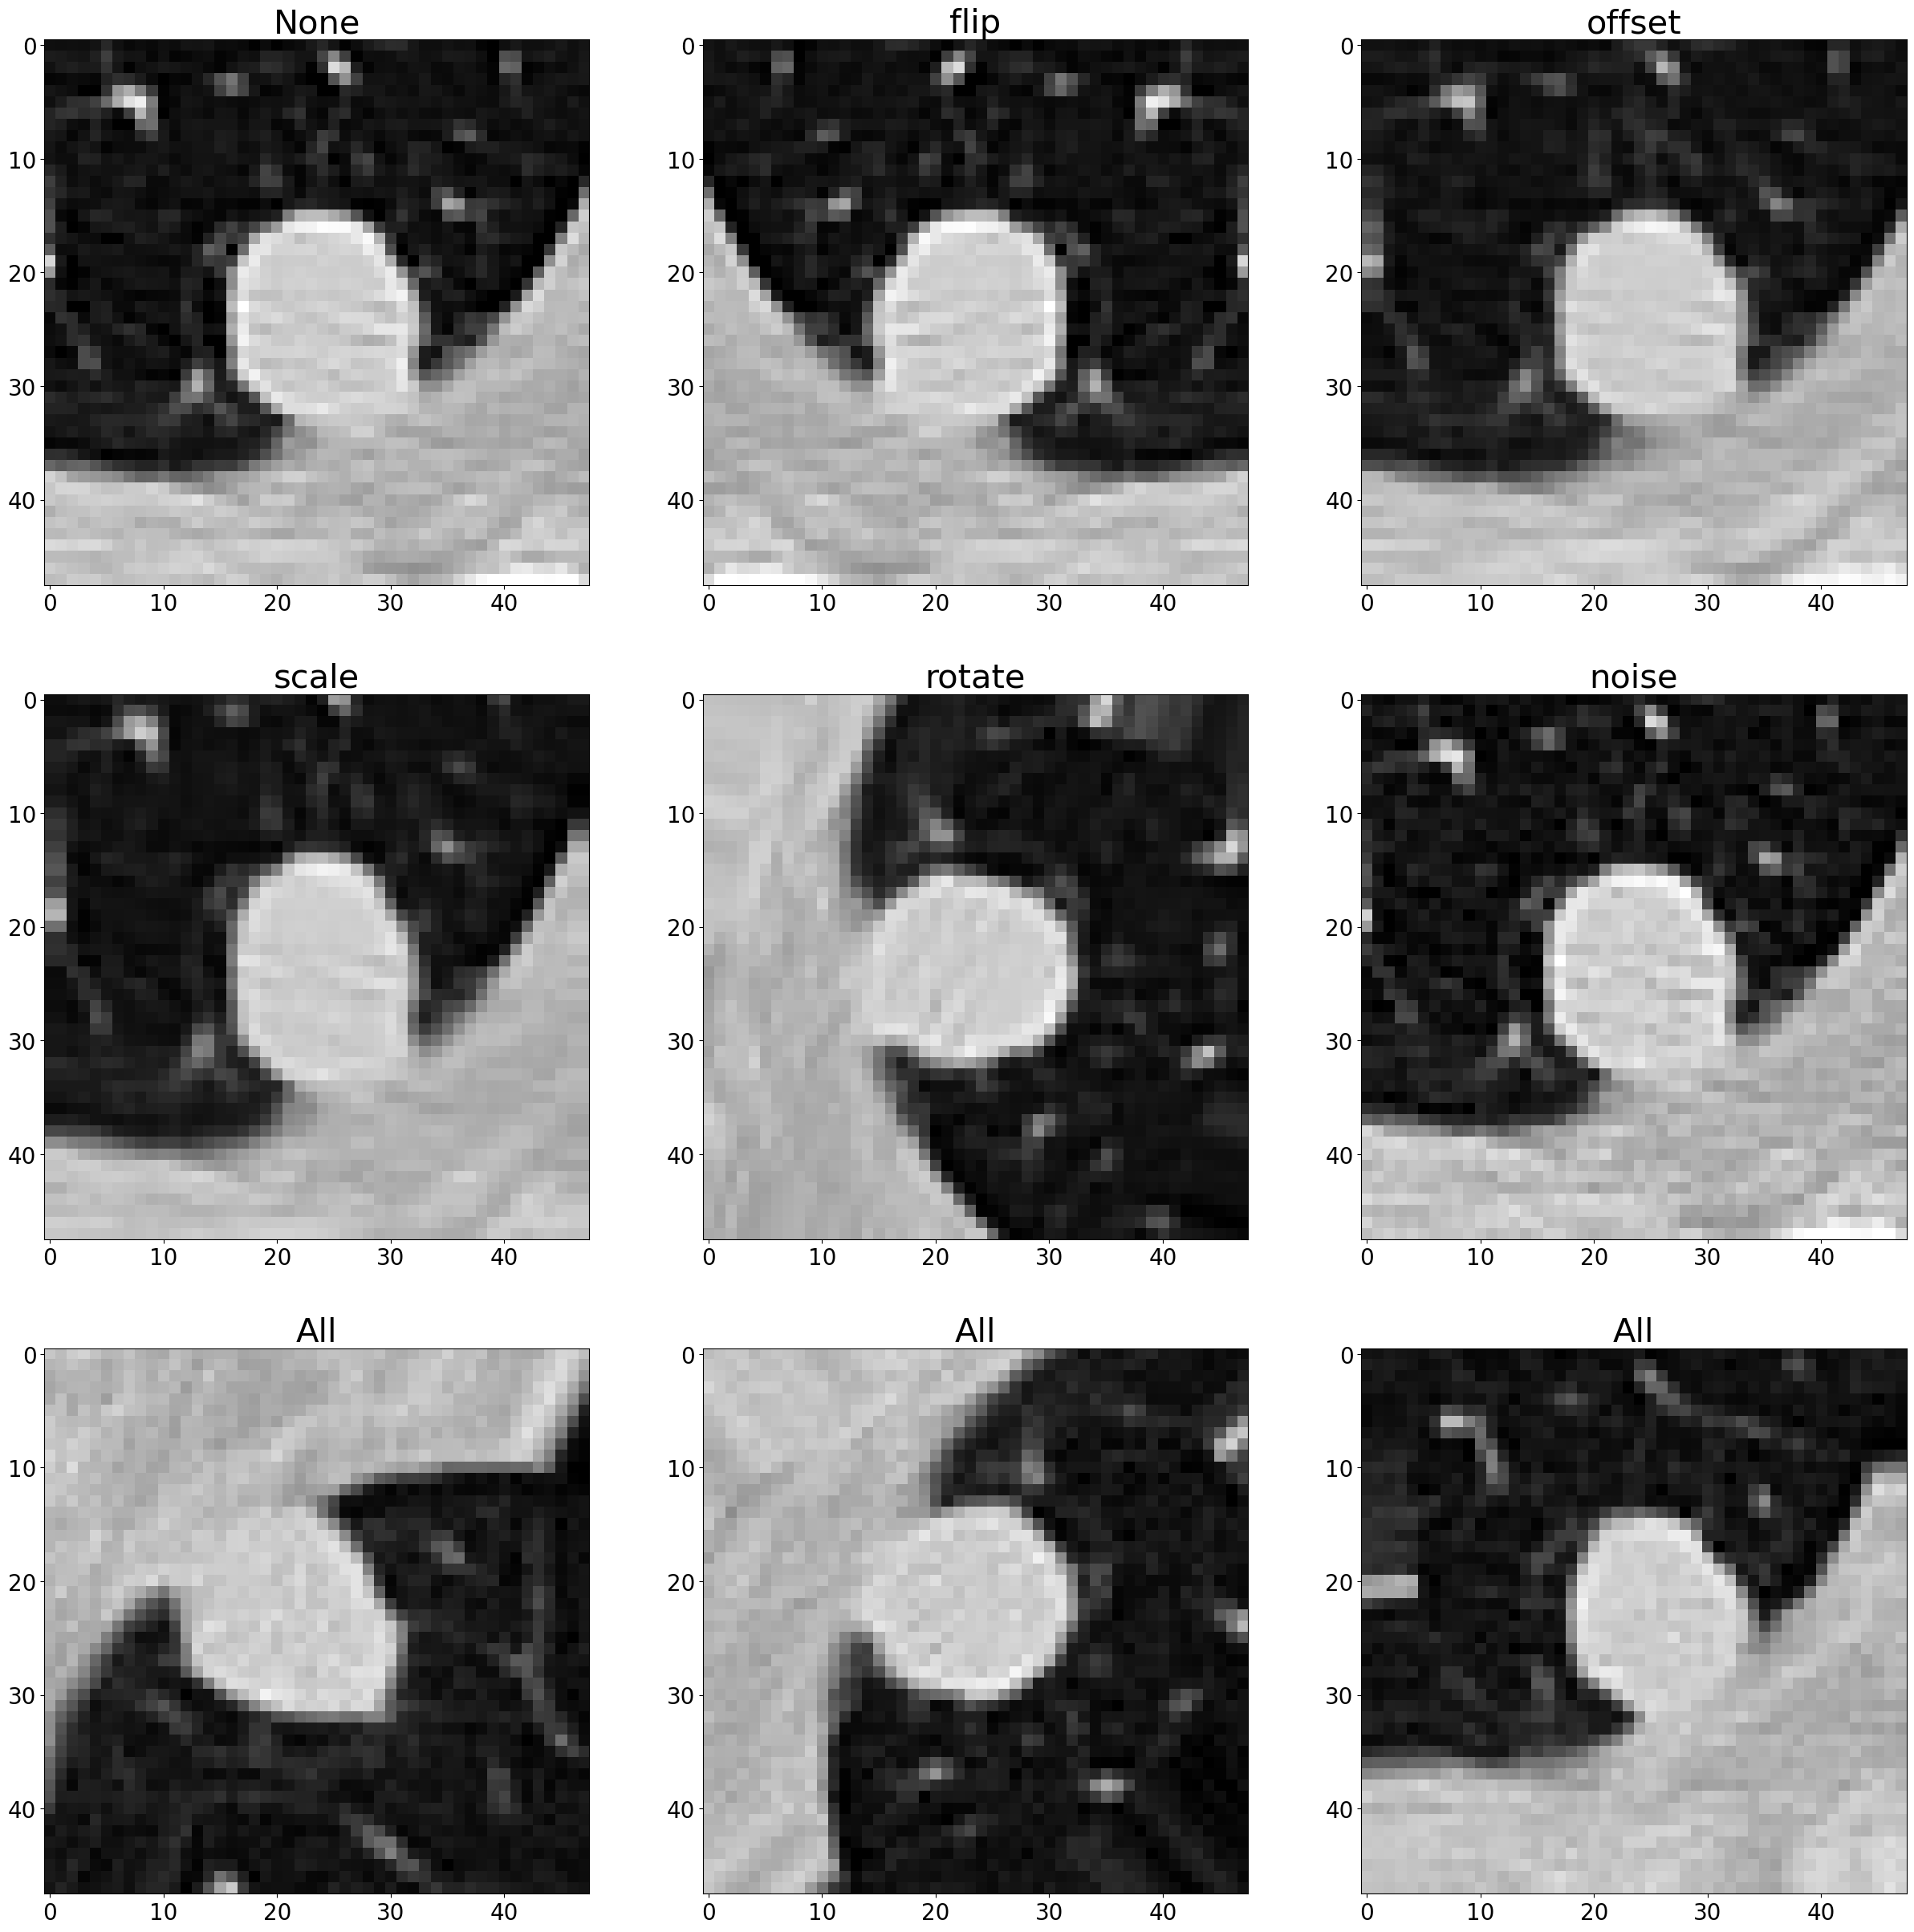

In [5]:
sample_ndx = 100
sample_ndx = 154
sample_ndx = 155

sample_tup = all_dataset[sample_ndx]
print(sample_tup[0].shape, sample_tup[1:])

fig = plt.figure(figsize=(30,30))
clim=(-1000.0,300)

print('augmentation_list', augmentation_list)

pack_list = []
for k in range(0, len(dataset_list)):
    pack_list.append((augmentation_list[k][0], dataset_list[k]))
print("pack_list", pack_list)

# for i, (augment, dataset) in enumerate(pack_list):#enumerate(zip(augmentation_list, dataset_list)):
for i in range(0, len(pack_list)):
    title_str, dataset = pack_list[i]
    sample_tup = dataset[sample_ndx]
    subplot = fig.add_subplot(3, 3, i+1)
    subplot.set_title(title_str, fontsize=30)
    for label in (subplot.get_xticklabels() + subplot.get_yticklabels()):
        label.set_fontsize(20)
    plt.imshow(sample_tup[0][0][16], clim=clim, cmap='gray')

2023-05-22 18:59:58,766 INFO     pid:22468 p2ch12.mod_dataset_luna:330:__init__ <p2ch12.mod_dataset_luna.LunaDataset object at 0x000002960E4C5370>: 911 training samples, 904 neg, 7 pos, unbalanced ratio


1.3.6.1.4.1.14519.5.2.1.6279.6001.112740418331256326754121315800 2 False [2, 296, 389, 432, 751, 880, 884]


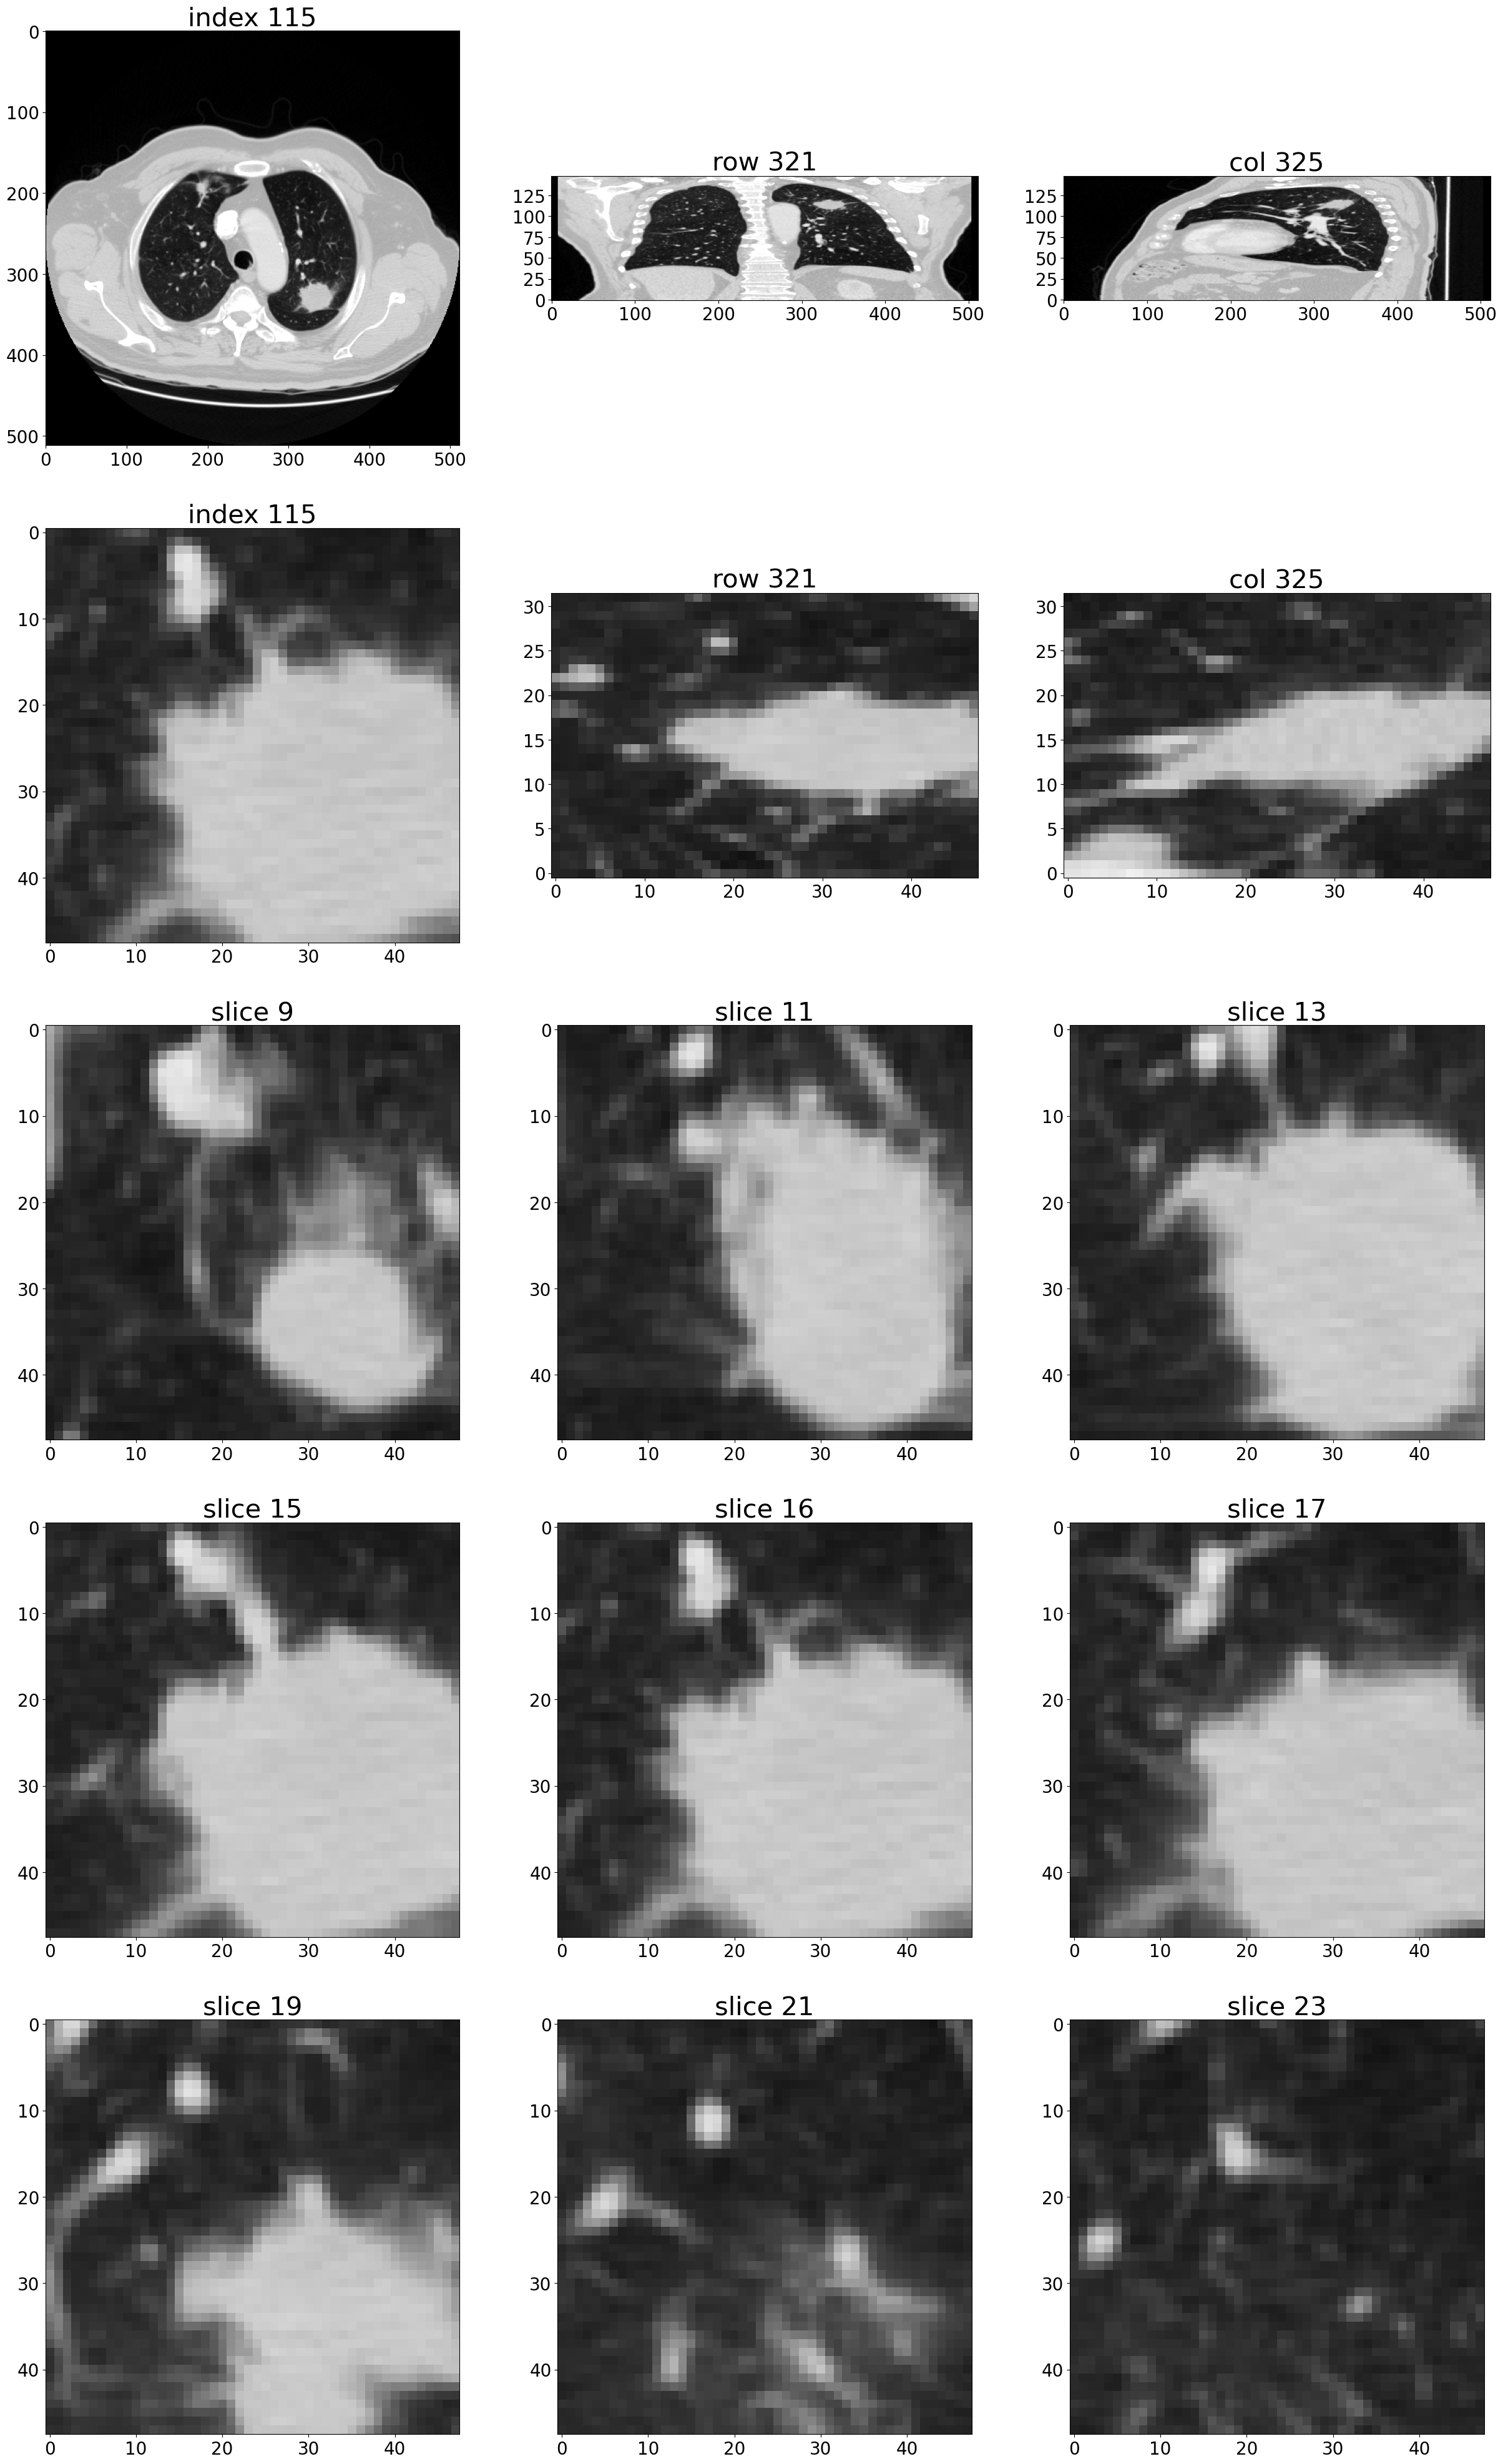

In [6]:
series_uid = positiveSample_list[1][2]
showCandidate(series_uid, datasetdir='E:/Luna16')